# <span style="color:darkblue"> QTM 151 - Final Project </span>

<font size="4"> 

Virginia Cano, Hanna Florence, Angelina Lee, Chloe Zhao

<font size = "5">

Importing relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf 

<font size = "5">

Introduction


<font size = "4">

Research Question: How do lap times vary across F1 circuits?



<font size = "3">

Formula 1, the highest class of international racing for open-wheel single-seater formula racing cars, attracts millions of fans worldwide. It is a sport not only testing speed, but of strategy, with teams and drivers making split second decisions during the races. F1 races, also known as Grand Prix, are held on various circuits across 34 countries worldwide. In this project, we explore how lap times vary across circuits, a fundamental question of the sport. The question of how different circuits affect race times is fun for the fans, but also integral for teams and engineers in optimizing the driver’s setup for success. We will analyze multiple F1 datasets as it is important to gain insight into the characteristics of circuits that lead to faster or shorter lap times. We begin this project with a data description followed by merging F1 datasets to combine all the information needed to answer our question. We then clean the data before formatting our findings to our fundamental question in graphs. Our first graph shows the average race time by circuit. Circuits with longer race times vs. shorter race times are a result of certain characteristics of the circuit. Our second graph shows the average fastest lap speed by circuit. Insights from these graphs aid race teams in devising strategic decisions. Our last graphs show us average milliseconds and average fastest lap speed by country. These two bar graphs allow us to further understand the trends of racing, but this time by countries. However, it is important to note that especially in lap speed values for certain countries, our data is incomplete and we must remember this when drawing conclusions based on these graphs.



<font size = "5">

Data Description

<font size = "3">

We will be using the following tables to examine the research question

<font size = "5">

Circuits table:

<font size = "3">

The file circuits.csv contains information on Formula One racing circuits around the world. Its codebook is:

<img src="figures/codebook_circuits.png" alt="drawing" width="500"/>

It is important to note that the variables of interest for our project are "circuitId", "name", and "country".

<font size = "5">

Races table:

<font size = "3">

The file races.csv contains information on Formula One races that have taken place since 1950. Its codebook is:

<img src="figures/codebook_races.png" alt="drawing" width="500"/>

It is important to note that the variables of interest for our project are "circuitId", "raceId", and "year".

<font size = "5">

Results table:

<font size = "3">

The results.csv file contains data on the results of Formula One races. Its codebook is:

<img src="figures/codebook_results.png" alt="drawing" width="500"/>   

It is important to note that the variables of interest for our project are "circuitId", "milliseconds", and "fastestLapSpeed".

In [3]:
# here is code for importing data
circuits = pd.read_csv("data_raw/circuits.csv")
circuit_subset = circuits[["circuitId", "name", "country"]]

races = pd.read_csv("data_raw/races.csv")
races_subset = races[["circuitId", "raceId", "year"]]

results = pd.read_csv("data_raw/results.csv")
results_subset = results[["raceId", "milliseconds", "fastestLapSpeed"]]


<font size = "5">

Merging data


In [4]:
# here is code for merging

#merging circuits and races
first_merge = pd.merge(circuit_subset,
                         races_subset,
                         on = "circuitId",
                         how = "left")

#merging new data set with results
final_merge = pd.merge(first_merge,
                         results_subset,
                         on = "raceId",
                         how = "left")

<font size = "3">

We used pandas to perform a left merge of "circuit_subset" onto "races_subset" on the common column "circuitId" to create a new dataset "first_merge". We then performed another left merge of "first_merge" onto "results_subset" on the common column "raceId". This is to combine information from all three datasets ("circuit_subset","races_subset","results_subset").

<font size = "5">

Data Cleaning 


In [5]:
#Here is code for data cleaning

#checking data types of all variables
print(final_merge.dtypes)

#cleaning milliseconds variable
subset = final_merge.query("milliseconds.str.isnumeric() == False")
list_unique = pd.unique(subset["milliseconds"])
print(list_unique)

final_merge["milliseconds"] = final_merge["milliseconds"].replace('\\N', np.nan,)
final_merge["milliseconds"] = pd.to_numeric(final_merge["milliseconds"])

#print(final_merge.dtypes)

#cleaning fastest lap speed
final_merge["fastestLapSpeed"] = final_merge["fastestLapSpeed"].replace('\\N', np.nan,)
final_merge["fastestLapSpeed"] = pd.to_numeric(final_merge["fastestLapSpeed"])

print(final_merge.dtypes)

circuitId           int64
name               object
country            object
raceId              int64
year                int64
milliseconds       object
fastestLapSpeed    object
dtype: object
['\\N']
circuitId            int64
name                object
country             object
raceId               int64
year                 int64
milliseconds       float64
fastestLapSpeed    float64
dtype: object


<font size = "3">

We began by cleaning the "milliseconds" column of the "final_merge" data. We filtered rows where "milliseconds" are not numeric and stored them in a subset ("subset"). We extracted and printed unique values from "subset" to identify any non-numeric entries in "milliseconds". We then replaced non-numeric values '\N' with NaN. We then converted the "milliseconds" column to a numeric data type to ensure that the data type of this column supports numerical operations. We applied to the same process to the "fastestLapSpeed" column, replacing '\N' with NaN and converting the column to a numeric type to handle any computations involving lap speeds.

<font size = "5">

Describing our data

<font size = "3">

Our main variables of interest are: 
- circuitID: Identifier for each circuit
- millisecond: Finishing time per lap in milliseconds
- fastestLapSpeed: Fastest lap speed in km/h
- Year: Year when the circuit season named is occuring

In [6]:
results_agg = final_merge.agg(mean_milliseconds = ('milliseconds','mean'),
                          min_milliseconds =  ('milliseconds','min'),
                          max_milliseconds =  ('milliseconds','max'),
                          mean_fastestLapSpeed = ('fastestLapSpeed','mean'),
                          min_fastestLapSpeed =  ('fastestLapSpeed','min'),
                          max_fastestLapSpeed =  ('fastestLapSpeed','max'),
                         count_obs   = ('circuitId',len))

display(results_agg)

,milliseconds,fastestLapSpeed,circuitId
mean_milliseconds,6.231870e+06,NaN,NaN
min_milliseconds,2.070710e+05,NaN,NaN
max_milliseconds,1.509054e+07,NaN,NaN
mean_fastestLapSpeed,NaN,203.089214,NaN
min_fastestLapSpeed,NaN,89.540000,NaN
max_fastestLapSpeed,NaN,257.320000,NaN
count_obs,NaN,NaN,25863.0


<font size = "3">

The finishing time per lap in milliseconds ranges from around 207071 ms to around 15090540 ms with a mean of around 6231870 ms. The fastest lap speeds range from around 89.54 km/h to around 257.32 km/h with a mean of around 203.09 km/h. We are observing 25863 rows of data.

<font size = "5">

Results

<font size = "3">

In the following, we will present different charts that display the lap times in F1 Circuits in different ways:

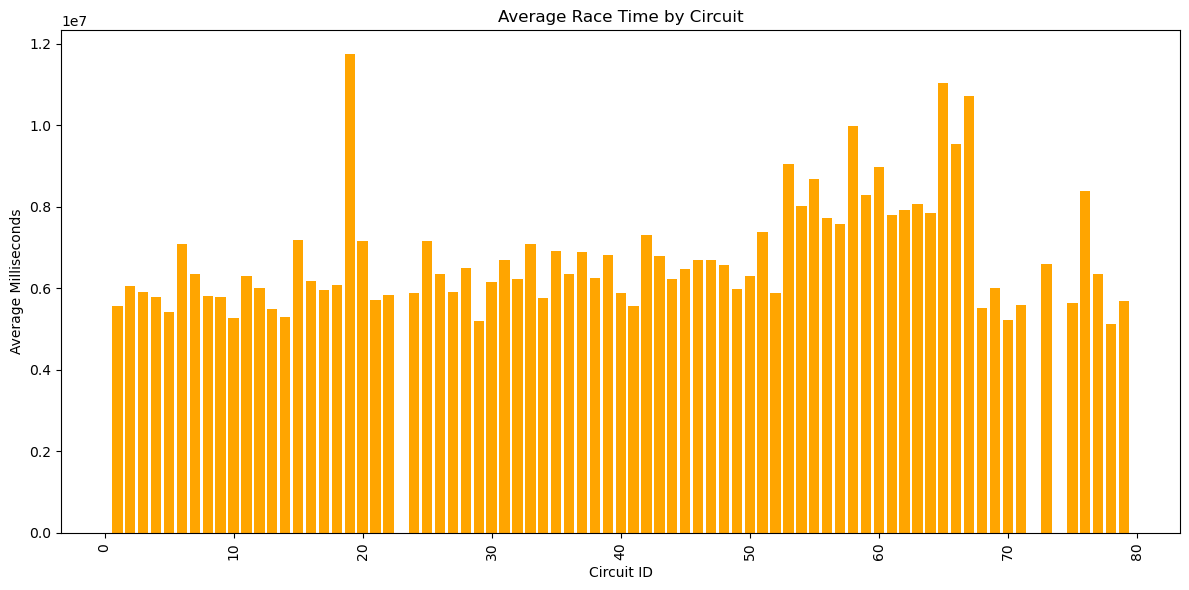

In [7]:
# circuits and average milliseconds (plot)
avg_milliseconds = final_merge.groupby('circuitId')['milliseconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_milliseconds['circuitId'], avg_milliseconds['milliseconds'], color='orange')
plt.title('Average Race Time by Circuit')
plt.xlabel('Circuit ID')
plt.ylabel('Average Milliseconds')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<font size = "4">

Average Race Time by Circuit Analysis

<font size = "3">

The bar graph showing average race time by circuit reveals insights into the characteristics of the different racing circuits. From the bar graph, we can see that the circuits with the highest average race times are circuits 19 (Indianapolis), 65 (Pescara), and 67 (Pedralbes). These circuits have certain characteristics that contribute to their longer durations. Circuit 65, Pescara, located in Italy, is known for its challenging layout with winding public roads, long straights, and tight corners. Circuit 67, Pedralbes, located in Barcelona, is known for its fast layout through public roads. Circuit 19, Indianapolis Motor Speedway, located in the US, is known for its long straights and banked corners. The intricacies of these circuits and their need for precision driving are factors that contribute to their longer race times. Conversely, from the plot, we can see that the circuits with the lowest average race times are circuits 29 (Adelaide), 78 (Losail), and 70 (Red Bull Ring). Circuit 29, Adelaide Street Circuit, located in Australia, is known for its short lap length and twisty street, making it difficult for drivers to have overtaking opportunities. Circuit 78, Losail International Circuit, located in Qatar, is known for its fast layout and smooth surface. Circuit 70, Red Bull Ring, located in Austria, is known for its short lap length and fast, sweeping corners. The bar graph gives better insight into which circuits produce the fastest and slowest average race times. By then analyzing the characteristics of those circuits, we can determine which circuit characteristics lead to faster average race times.


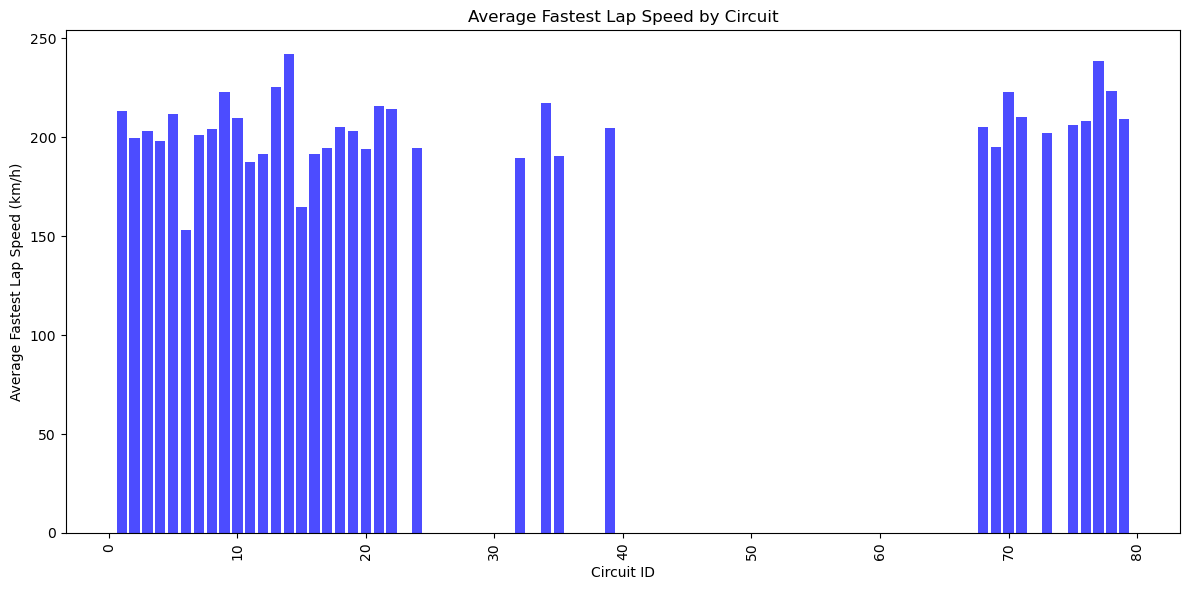

In [8]:
# circuits and average fastest time (plot)

avg_fastest_speed = final_merge.groupby('circuitId')['fastestLapSpeed'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_fastest_speed.index, avg_fastest_speed, color='blue', alpha=0.7)
plt.title('Average Fastest Lap Speed by Circuit')
plt.xlabel('Circuit ID')
plt.ylabel('Average Fastest Lap Speed (km/h)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<font size = "4">

Average Fastest Lap Speed by Circuit Analysis

<font size = "3">

The bar graph of average fastest lap speed by circuit serves as a valuable tool for both the technical aspects of racing. From the bar graph, we can see Circuit 6 (Monaco) has the lowest average fastest lap speed, while Circuit 14 (Monza) has the highest. Monaco's low average fastest lap speed is a result of its tight and twisty street circuit layout, with narrow streets and many tight corners that limit the speed at which cars can drive. Monza's high average fastest lap speed is a result of its high-speed layout, with long straights and fast corners. This bar graph is important as it provides valuable information into the performance and characteristics of different racing circuits. It allows racing teams, engineers, and the drivers to understand the nature of each circuit in terms of speed and performance. For teams and engineers, this information is crucial for developing race strategies, optimizing car setups, and figuring out the most effective driving techniques for each circuit.


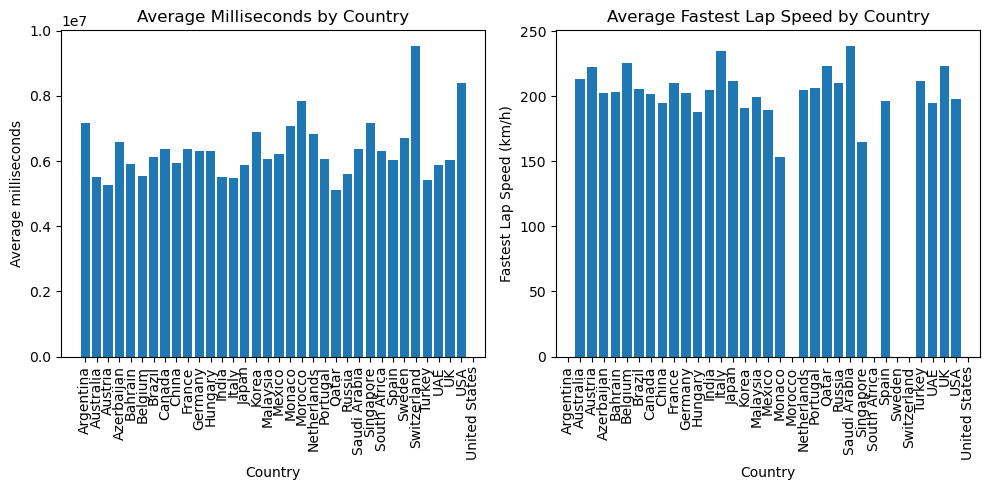

In [9]:
# circuits and average milliseconds (plot), as well as fastest lap speed

avg_country_milliseconds = final_merge.groupby('country')['milliseconds'].mean().reset_index()
avg_country_fastest_speed = final_merge.groupby('country')['fastestLapSpeed'].mean().reset_index()

fig, list_subfig = plt.subplots(1, 2, figsize=(10, 5)) 

# First Figure
list_subfig[0].bar(avg_country_milliseconds['country'], avg_country_milliseconds['milliseconds'])
list_subfig[0].set_title("Average Milliseconds by Country")
list_subfig[0].set_xlabel("Country")
list_subfig[0].set_ylabel("Average milliseconds")
list_subfig[0].tick_params(axis='x', rotation=90)  

# Second Figure
list_subfig[1].bar(avg_country_fastest_speed['country'], avg_country_fastest_speed['fastestLapSpeed'])
list_subfig[1].set_title("Average Fastest Lap Speed by Country")
list_subfig[1].set_xlabel("Country")
list_subfig[1].set_ylabel("Fastest Lap Speed (km/h)")
list_subfig[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

<font size = "4">

Average Milliseconds and Fastest Lap Speed by Country

<font size = "3">

These two bar graphs allow us to further understand the trends of racing, but this time by countries. We can see that the country with the highest milliseconds is Switzerland. This country has hosted the Circuit Bremgarten (1934 - 1939, 1947 - 1954), and Dijon-Prenois  (1975, 1982). Seeing that the last grand prix in Switzerland was in 1982, we can understand why this country is highlighted as the slowest speed. Regarding the average fastest lap speed, results are very similar across countries. However, we can note that Monaco has particularly low values when compred to other countries. This, as mentioned above, could be due to the Monaco circuit's hard-to-drive structure

These plots also highlight the fact that this dataset is somewhat incomplete, especially the Lap Speed value, which has NA values for 6 countries (Morocco, South Africa, Sweden, Switzerland, United States). This is important to acknowledge as we draw conclusions about racing through these plots.



<font size = "5">

Discussion

<font size = "3">


By looking at our analysis of the cleaned and merged datasets, we can draw several conclusions regarding the Formula 1 race circuits and their characteristics. Circuits such as Indianapolis, Pescara, and Pedralbes show longer average race times, which could potentially be due to factors like challenging layouts and the precision driving needs. On the other hand, circuits like Adelaide, Losail, and Red Bull Ring have shorter race times with shorter lap lengths and faster layouts. Moreover, our analysis of average fastest lap speeds highlights the differences between circuits, with Monaco having the lowest average speeds due to its tight street layout, while Monza has the highest speeds due to its high-speed design. The race data by country shows more information containing Switzerland's slow race times due to not hosting a Grand Prix since 1982, and we see indications of potential inconsistencies or missing parts in the dataset.